# 1. Load the dataset

In [117]:
import tqdm
import gdown
import zipfile

from transformers.image_transforms import rescale

# Load the dataset from the local folder
dataset_url = 'https://drive.google.com/file/d/1qjVfiihN_MNdrOJXZIaS_JQ8JzO5pxfM/view?usp=sharing'
gdown.download(dataset_url, output='data.zip', quiet=False, fuzzy=True)

# extract the dataset from the zip file
with zipfile.ZipFile("data.zip","r") as zf:
    for member in tqdm.tqdm(zf.infolist(), desc='Extracting '):
        try:
            zf.extract(member, 'data')
        except zipfile.error as e:
            pass
print('Importing dataset completed')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1qjVfiihN_MNdrOJXZIaS_JQ8JzO5pxfM
From (redirected): https://drive.google.com/uc?id=1qjVfiihN_MNdrOJXZIaS_JQ8JzO5pxfM&confirm=t&uuid=d6e7c182-b766-4121-8acb-0417ad79ba79
To: C:\Users\jonat\PycharmProjects\ML-Final-Project\data.zip
100%|██████████| 583M/583M [02:18<00:00, 4.22MB/s] 
Extracting : 100%|██████████| 3770/3770 [00:03<00:00, 1167.87it/s]

Importing dataset completed


In [72]:
import pathlib

# Count the number of images in the dataset
data_dir = pathlib.Path('./data')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f"The dataset contains {image_count} images")

The dataset contains 3770 images


In [28]:
# divide the dataset into 5 categories
categories = ['beauty', 'family', 'fashion', 'fitness', 'food']
label2id_dict = dict((name, index) for index, name in enumerate(categories))
id2label_dict = dict((index, name) for index, name in enumerate(categories))
print('The categories are: ', categories)
dataset = []
for category in categories:
    dataset.append(list(data_dir.glob(category+'/*.jpg')))
    print(f"{category} images: {len(list(data_dir.glob(category+'/*.jpg')))}")

The categories are:  ['beauty', 'family', 'fashion', 'fitness', 'food']
beauty images: 754
family images: 754
fashion images: 754
fitness images: 754
food images: 754


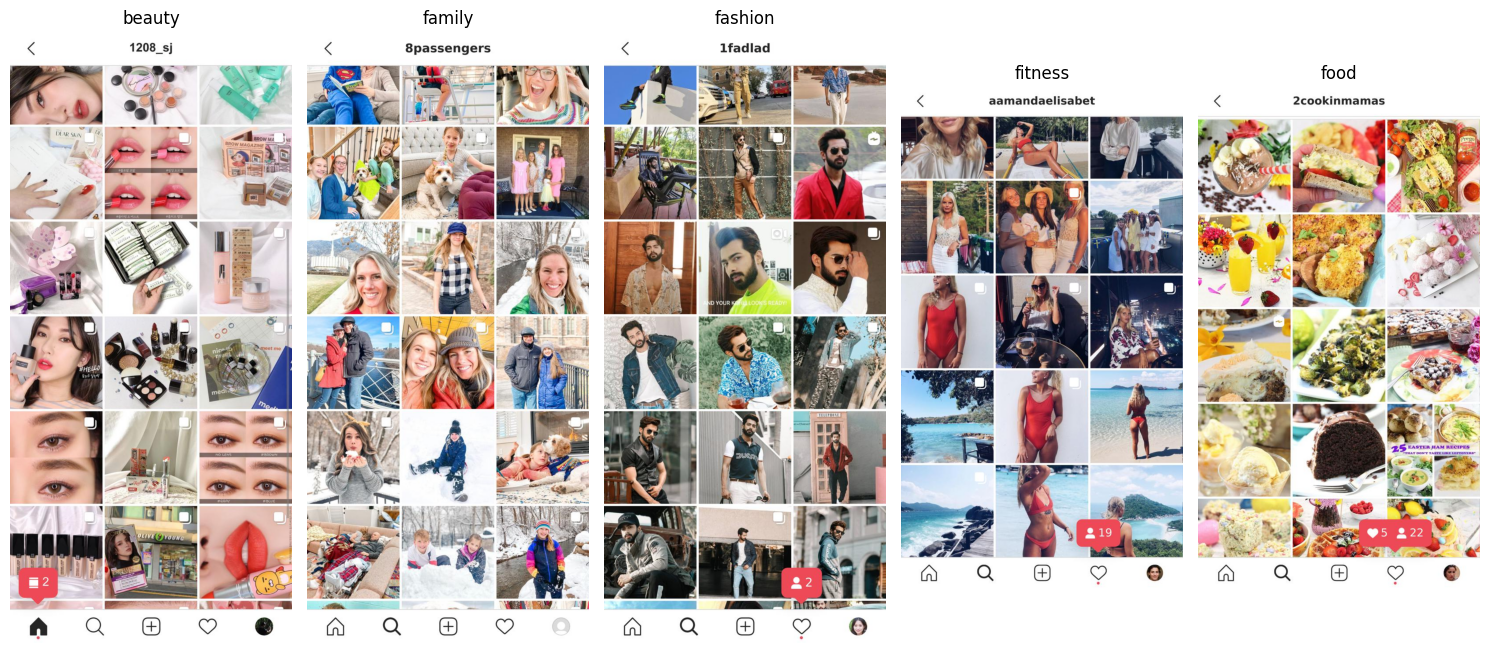

In [29]:
# plot one image per category
import matplotlib.pyplot as plt
import PIL

plt.figure(figsize=(15, 15))
for index, category in enumerate(categories):
    img = dataset[index][0]
    plt.subplot(1, 5, index+1)
    plt.imshow(PIL.Image.open(str(img)))
    plt.title(category)
    plt.axis('off')

plt.tight_layout()
plt.show()

# 2. Process + Visualize the data

In [37]:
import numpy as np
import tensorflow as tf

seed = 42
# set seed for tensorflow take
tf.random.set_seed(seed)
# set seed for numpy
np.random.seed(seed)
print(f"Random seed set as {seed}")

Random seed set as 42


In [63]:
# split the dataset into training and testing
from tensorflow.keras.preprocessing import image_dataset_from_directory

# 80% of the images are used for training, 20% for testing
train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(128, 128),
    batch_size=1,
    label_mode='categorical',
    labels='inferred',
    shuffle=True,
    color_mode="rgb",
)

test_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(128, 128),
    batch_size=1,
    shuffle=True,
    color_mode="rgb"
)

# print the shape of the first image
for images, labels in train_ds.take(1):
    print(f"Shape of the image: {images[0].shape}")

Found 3770 files belonging to 5 classes.
Using 3016 files for training.
Found 3770 files belonging to 5 classes.
Using 754 files for validation.
Shape of the image: (128, 128, 3)


In [64]:
# print the first 10 rows of the training dataset in the format (image, label)
i = 0
for images, labels in train_ds.take(5):
    print(f"Image {i+1}: {images[0]}")
    print(f"Label {i+1}: {labels[0]}")
    i+=1

Image 1: [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
Label 1: [0. 0. 0. 0. 1.]
Image 2: [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 2

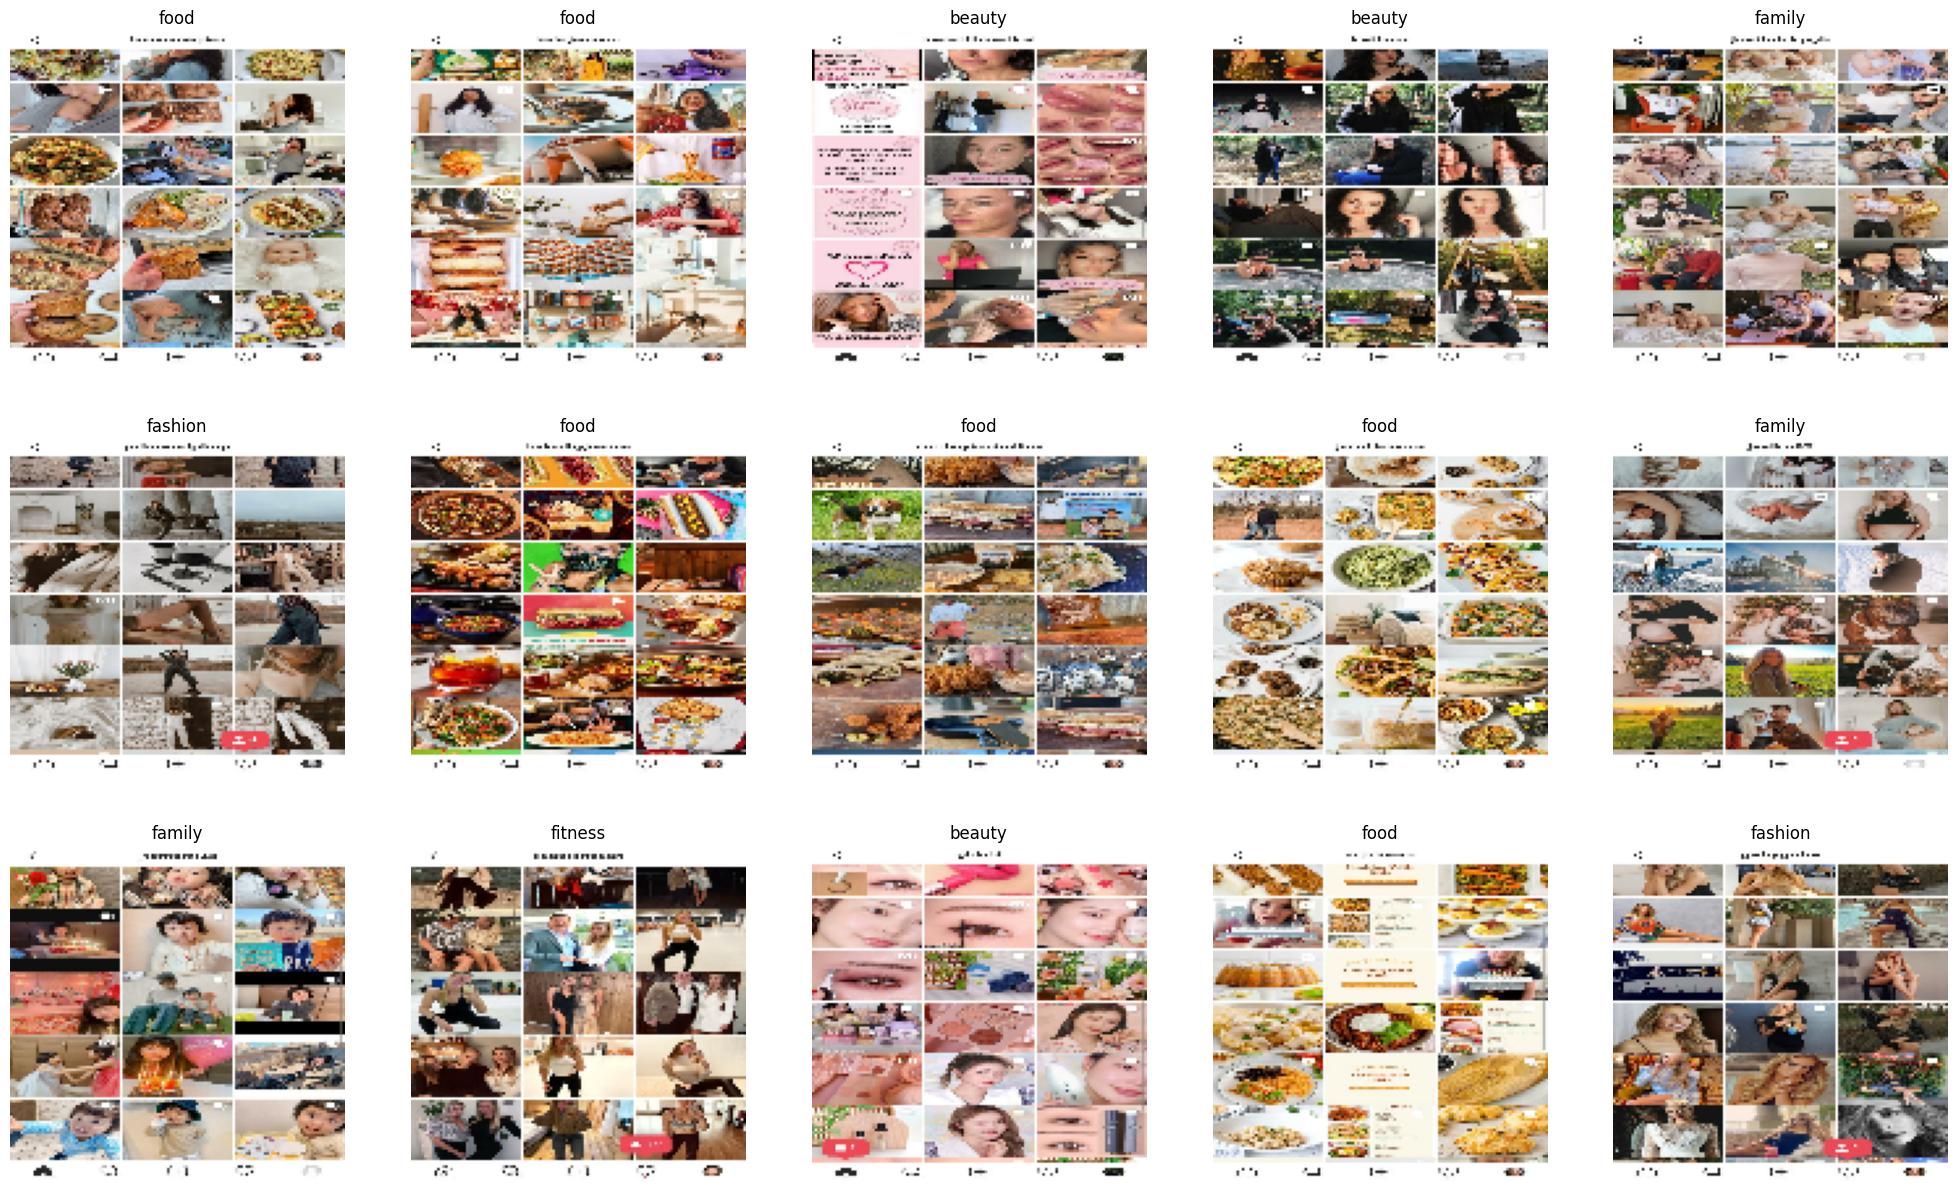

In [65]:
# plot the first 15 images of the training dataset
plt.figure(figsize=(25, 15))
i = 0
for images, labels in train_ds.take(15, ):
    image = images[0]
    label = labels[0]
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(image.numpy().astype("uint8"), cmap='gray')
    plt.title(id2label_dict[label.numpy().argmax()])
    plt.axis("off")
    i += 1

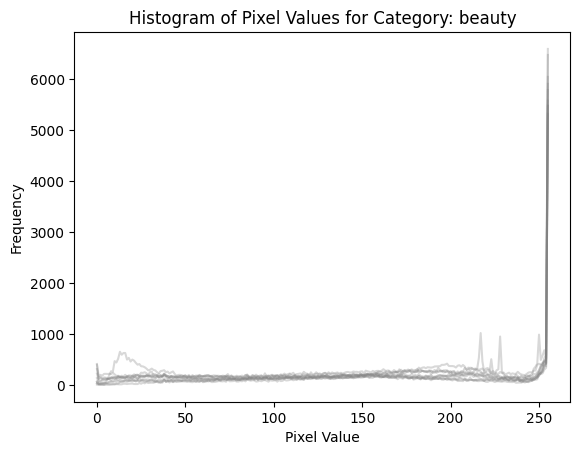

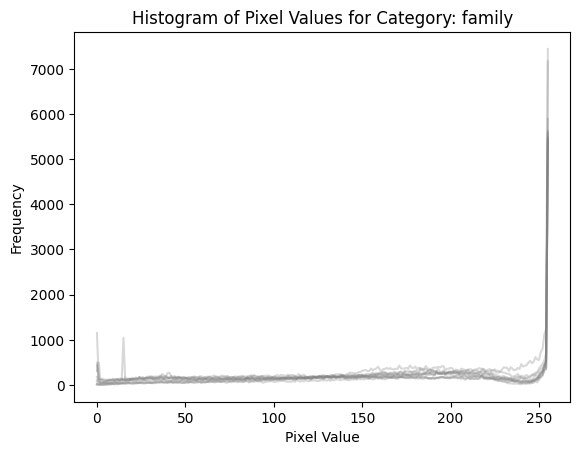

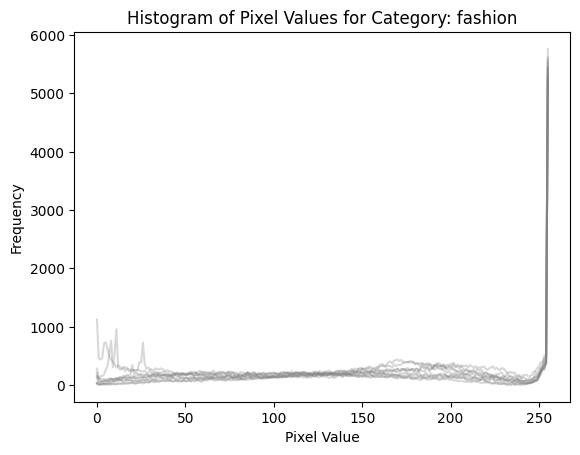

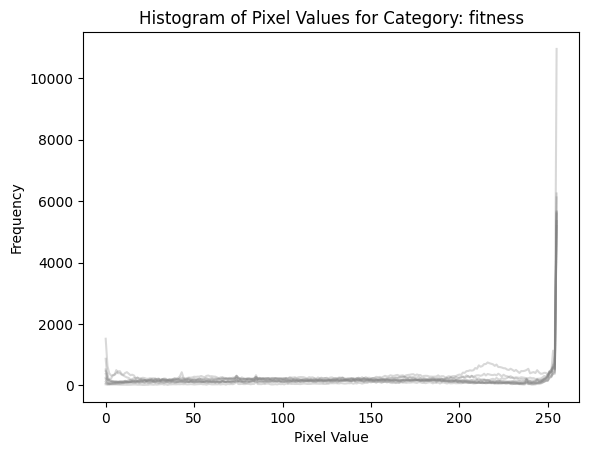

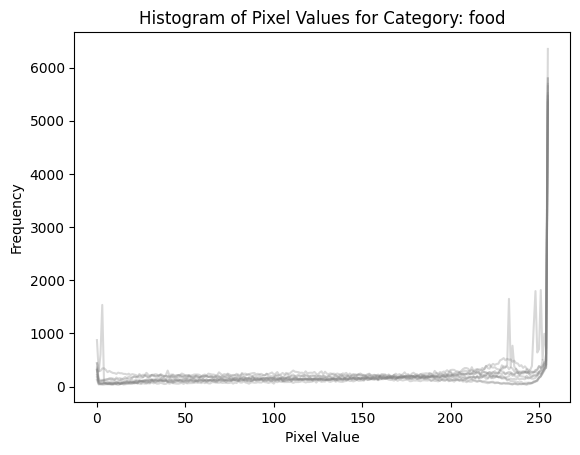

In [103]:
import numpy as np
import matplotlib.pyplot as plt

categories = train_ds.class_names

# Iterate over the categories
for category_index, category in enumerate(categories):
    histogram_values = []

    # Iterate over the train_ds dataset and compute histogram for the current category
    for images, labels in train_ds:
        image = images[0]  # Assuming batch size is 1
        label = labels[0].numpy()

        if np.argmax(label) == category_index:
            # Compute histogram of pixel values
            hist, bins = np.histogram(image.numpy().flatten(), bins=256, range=[0, 255])
            histogram_values.append(hist)

        if len(histogram_values) >= 10:  # Plot histograms for a maximum of 10 images per category
            break

    # Plot histogram for the current category
    plt.figure()
    # plot the histogram
    for hist_values in histogram_values:
        plt.plot(range(len(hist_values)), hist_values, color='grey', alpha=0.3)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Pixel Values for Category: {category}')
    plt.show()

Each image is 128x128 pixels with 1 channel (grayscale). The labels are one-hot encoded.
Each image contains multiple images in a grid. Now, we need to augment a new image from the grid image.

In [66]:
from keras.preprocessing.image import ImageDataGenerator
# Augment the image using keras preprocessing layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.2),
    tf.keras.layers.experimental.preprocessing.RandomTranslation(0.2, 0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

# augment the image in train_ds
train_ds_aug = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
test_ds_aug = test_ds.map(lambda x, y: (data_augmentation(x, training=False), y))

# print the shape of the first image
for images, labels in train_ds_aug.take(1):
    print(f"Shape of the image: {images[0].shape}")


for images, labels in train_ds_aug.take(5):
    print(f"Image {i+1}: {images[0]}")
    print(f"Label {i+1}: {labels[0]}")

Shape of the image: (128, 128, 3)
Image 16: [[[0.9681353  0.96667796 0.96421206]
  [0.95042133 0.948964   0.946498  ]
  [0.93769836 0.93624103 0.93377507]
  ...
  [0.41324437 0.4793391  0.49228793]
  [0.40425825 0.44674686 0.44772652]
  [0.42835277 0.4266731  0.4095191 ]]

 [[0.9681353  0.96667796 0.96421206]
  [0.9681353  0.96667796 0.96421206]
  [0.9681353  0.96667796 0.96421206]
  ...
  [0.44632405 0.49864867 0.50442886]
  [0.41788322 0.44000426 0.42819843]
  [0.44652885 0.42135277 0.39137718]]

 [[0.9681353  0.96667796 0.96421206]
  [0.9681353  0.96667796 0.96421206]
  [0.9681353  0.96667796 0.96421206]
  ...
  [0.5152999  0.5392454  0.53490686]
  [0.48432902 0.47101727 0.44449514]
  [0.5184864  0.47032773 0.43201318]]

 ...

 [[0.35242537 0.37023756 0.2719707 ]
  [0.3626316  0.39672706 0.29089537]
  [0.37342465 0.41423473 0.30599838]
  ...
  [0.9681353  0.96667796 0.96421206]
  [0.9681353  0.96667796 0.96421206]
  [0.9681353  0.96667796 0.96421206]]

 [[0.34268847 0.40613586 0.277

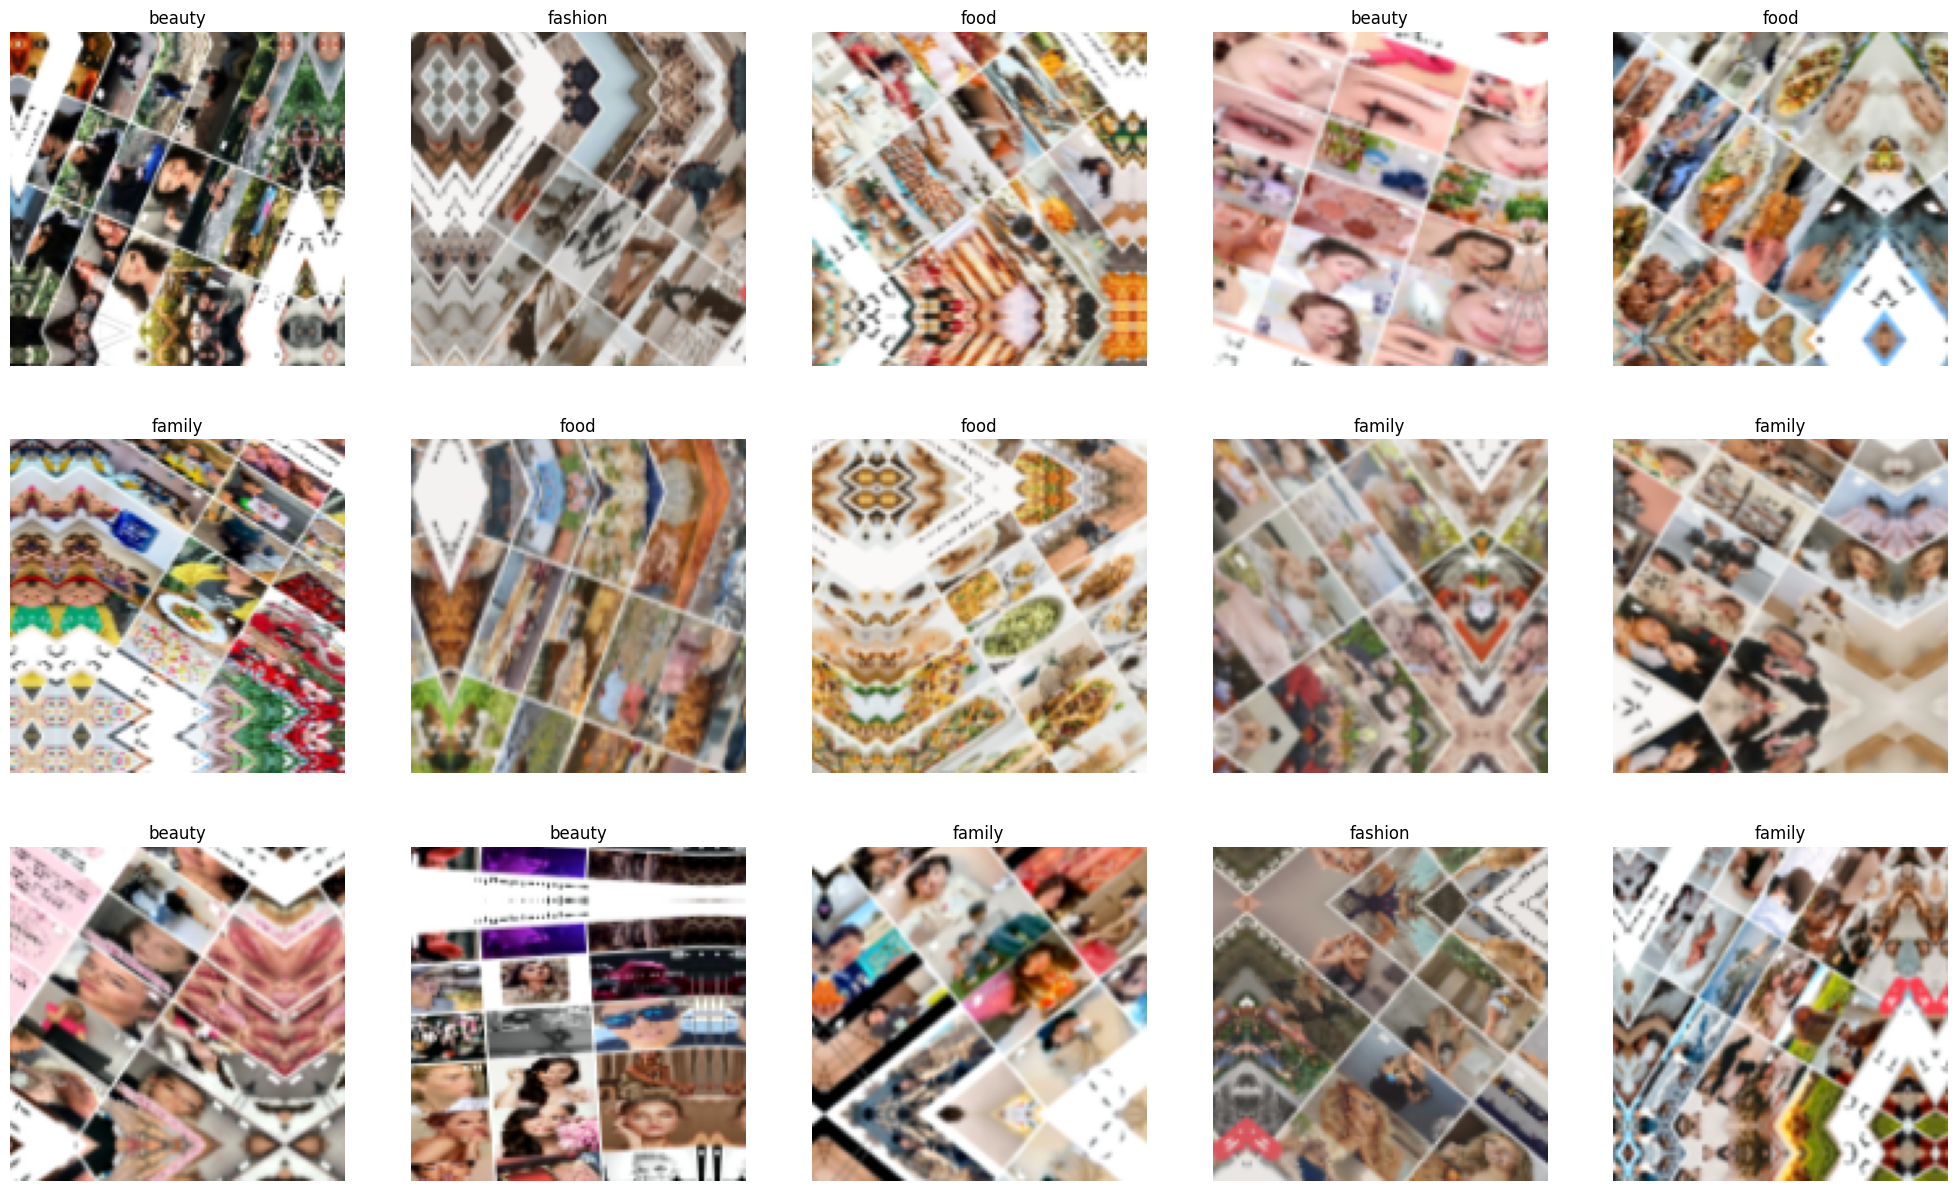

In [67]:
# plot the first 15 images of the training dataset
plt.figure(figsize=(25, 15))
i = 0
for images, labels in train_ds_aug.take(15, ):
    image = images[0]
    label = labels[0]
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(image.numpy().astype("float"), cmap='gray')
    plt.title(id2label_dict[label.numpy().argmax()])
    plt.axis("off")
    i += 1

In [68]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model (excluding the top classification layers)
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the weights of the VGG16 layers to prevent further training
vgg16.trainable = False

# Add a flatten layer to convert the output of VGG16 into a 1D array
flatten_layer = Flatten()(vgg16.output)

# Create a new model that takes VGG16 output as input and outputs the flattened representation
flatten_model = Model(inputs=vgg16.input, outputs=flatten_layer)

# Apply the flatten_model to train_ds_aug and test_ds_aug
train_ds = train_ds_aug.map(lambda x, y: (flatten_model(x), y))
test_ds = test_ds_aug.map(lambda x, y: (flatten_model(x), y))

# Print the shape of the first image
for images, labels in train_ds_aug.take(1):
    print(f"Shape of the image: {images.shape}")

Shape of the image: (1, 8192)


In [70]:
# print the first 10 rows of the training dataset in the format (image, label)
i = 0
for images, labels in train_ds_aug.take(5):
    print(f"Image {i+1}: {images[0]}")
    print(f"Label {i+1}: {labels[0]}")
    i+=1

Image 1: [0.         0.         0.         ... 0.6216461  0.16813603 0.        ]
Label 1: [0. 0. 0. 1. 0.]
Image 2: [0.5864489  0.         0.093606   ... 0.         0.37577495 0.        ]
Label 2: [1. 0. 0. 0. 0.]
Image 3: [0.         0.         0.         ... 0.00124451 1.0339648  0.        ]
Label 3: [0. 0. 0. 0. 1.]
Image 4: [0.         0.         0.         ... 0.         0.46771905 0.        ]
Label 4: [0. 0. 1. 0. 0.]
Image 5: [0.06932074 0.         0.48299432 ... 0.         0.4713714  0.        ]
Label 5: [0. 0. 0. 0. 1.]
